In [1]:
from ROOT import TH1F, TCanvas, TF1


Welcome to JupyROOT 6.14/06


In [2]:
import numpy as np

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
test_data = np.load("/Users/cdesio/Downloads/Predicted_2_4_10_25_ALL_out_model_trained_on_npz.npz")

In [5]:
data_15mm = np.load("/Users/cdesio/Downloads/Predicted_15mm_ALL_out_model_trained_on_npz.npz")

In [6]:
y_true_testdata = test_data["true"]
y_pred_testdata = test_data["pred"]

In [7]:
y_true_15mm = data_15mm['true']
y_pred_15mm = data_15mm['pred']

In [12]:
def gaus_fit(y_preds, y_true, keyword, n_bins = 10, histo_min = -1.0, histo_max = 1.0, key="test"):
    true = y_true
    preds = y_preds

    mean = np.mean(true-preds)
    histo = TH1F("data_{}".format(keyword),"Distribution of prediction errors for cUNet estimations", 
                 n_bins,histo_min,histo_max)
    for i in (true-preds-mean):
        histo.Fill(i)
    
    canvas = TCanvas()
    f = TF1("f","gaus")
    f.FixParameter(1,mean)

    histo.Fit(f, "S")
    
    yax=histo.GetYaxis()
    yax.SetLimits(0,500)
    #histo.SetAxisRange(0, 500,"y")
    histo.Draw()
    canvas.Draw()
    return histo, canvas

 FCN=219.095 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=2.19224e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.03304e+02   2.80543e+00   1.60223e-02   2.99222e-06
   2  Mean        -6.94444e-05     fixed    
   3  Sigma        1.40429e-01   2.35427e-03   2.95416e-05   1.03342e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_test (Potential memory leak).


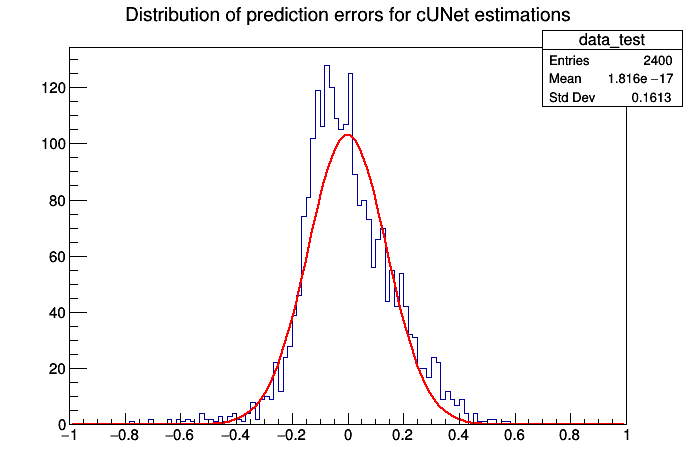

In [13]:
histo_test, canvas_test = gaus_fit(y_pred_testdata, 
                                   y_true_testdata, 
                                   n_bins = 120,
                                   keyword =  "test")

 FCN=28.0453 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=3.77365e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.74666e+01   2.39379e+00   5.12420e-03   9.44661e-05
   2  Mean        -1.66667e-04     fixed    
   3  Sigma        1.01387e-01   2.55108e-03   1.79126e-05  -8.68016e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm (Potential memory leak).


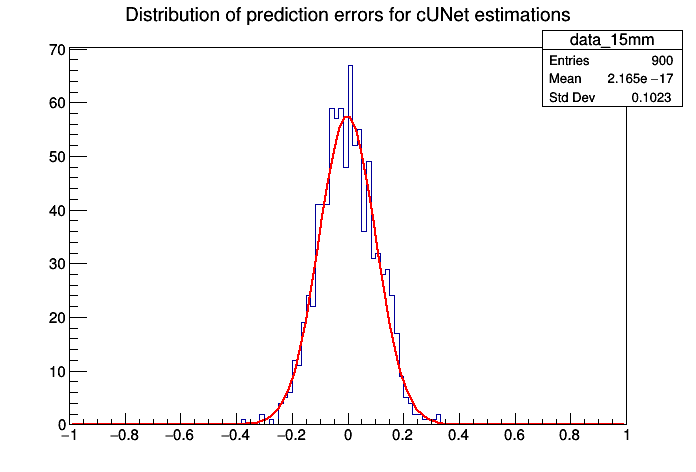

In [15]:
histo_15mm, canvas_15mm = gaus_fit(y_pred_15mm, 
                                   y_true_15mm, 
                                   n_bins = 120,
                                   keyword =  "15mm",
                                  histo_min = -1.0,
                                  histo_max = 1.0)